# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.185066e+01     7.326133e+00
 * time: 0.002444028854370117
     1     2.995622e+01     7.045356e+00
 * time: 0.010856151580810547
     2     2.121884e+01     6.113806e+00
 * time: 0.021067142486572266
     3     1.583106e+01     5.519851e+00
 * time: 0.031187057495117188
     4     1.180856e+01     1.878951e+00
 * time: 0.04182004928588867
     5     1.142729e+01     2.436793e+00
 * time: 0.05045318603515625
     6     1.059640e+01     1.527919e+00
 * time: 0.05900096893310547
     7     9.824898e+00     1.567514e+00
 * time: 0.06757807731628418
     8     9.358973e+00     1.554285e+00
 * time: 0.07621407508850098
     9     9.070330e+00     1.197722e+00
 * time: 0.08483099937438965
    10     8.842140e+00     8.576748e-01
 * time: 0.09380912780761719
    11     8.635830e+00     7.380009e-01
 * time: 0.10245800018310547
    12     8.414208e+00     4.626971e-01
 * time: 0.11097002029418945
    13     8.256286e+00     5.021774e-01
 * t

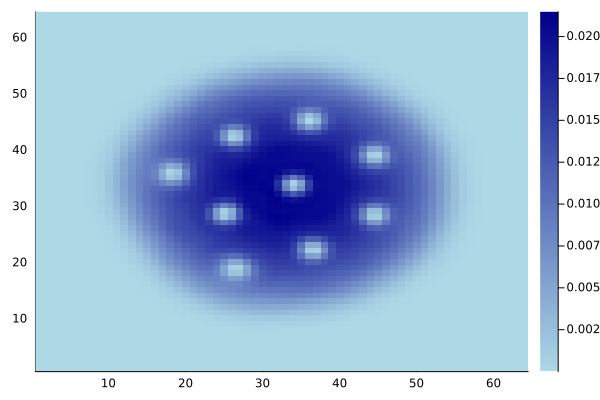

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)